<img src="./img/DC_Gray _Logo.png">

<center><h2> Module 3 Project</h2></center>
<center><h2> Hypothesis Testing</h2></center>

**Authors:**

#### Business Problem

#### Analysis

In [5]:
%load_ext autoreload
%autoreload 2

In [79]:
from data_precleaning import *
from data_cleaning import *
from comparison_attribute import *
from aggregation import *
from election_by_state import *
from hypothesis_tests import *
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import numpy

In [31]:
#load raw json
'''list_of_files=json_filter("json_data")
csv_list=[]
for i in list_of_files:
    jsons=json_generator(i)
    csv_list.append(generate_kickstarter_csv(jsons))'''

In [57]:
#cleaned file saved to a pickle that is easy to load
'''kickstarter=kickstarter_concat(csv_list,"Trial_Pickle")
category=pd.read_csv("data/categories.csv")
kickstarter_cleaned=full_clean(kickstarter,category)'''

C:\Users\power\OneDrive\Desktop\mod3-hypothesis-testing\data_cleaning.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dirty_data['Pledge_Percentage']= dirty_data['Pledged']/ dirty_data['Goal']*100
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\power\OneDrive\Desktop\mod3-hypothesis-testing\data_cleaning.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [58]:
#load all data
kickstarter_clean=pd.read_pickle("data/cleaned_df.pickle")
trustdata = pd.read_csv('data/self-reported-trust-attitudes.csv')
election_data=pd.read_csv('data/1976-2016-president.csv')

In [59]:
#Question 1: How does trust correlate with funding rate

In [60]:
trust_funding_data=add_trustdata(trustdata, kickstarter_clean)

We use the year(s) [2014] in the trust data
There are 98 countries in the trust data
After merge, there are 78 countries in the country-trust-funding data


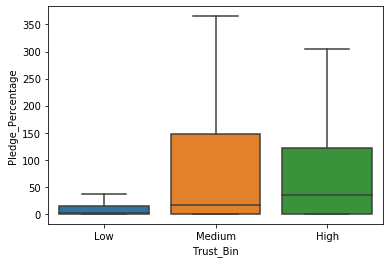

In [61]:
#plot 1: destribution of Funding Percentage for Low trust, Medium trust and High trust countries
sns.boxplot(x='Trust_Bin', y='Pledge_Percentage', data=trust_funding_data, showfliers=False)

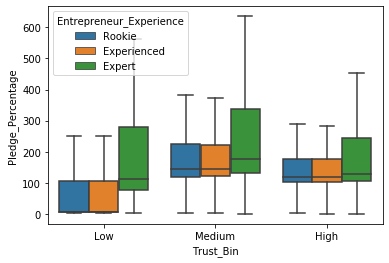

In [63]:
sns.boxplot(x='Trust_Bin', y='Pledge_Percentage', data=trust_funding_data, hue="Entrepreneur_Experience", showfliers=False)

In [64]:
#aggregate the election data to blue state and red state
election_agged=DT_Effect(election_data)

In [65]:
kickstarter_us=kickstarter_clean[kickstarter_clean['Country'].isin(['US'])]
#kick_us_agged=Aggregate_Mean(kickstarter_us,['Trump_Election','Sup_Category','State','Created_Month'])
kickstarter_us=kickstarter_us.merge(election_agged, on=['State'])

In [70]:
kickstarter_ca=kickstarter_clean[kickstarter_clean['Country'].isin(['CA'])]

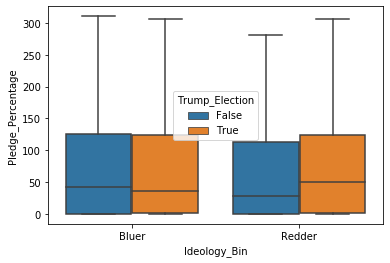

In [69]:
sns.boxplot(x='Ideology_Bin', y='Pledge_Percentage', data=kickstarter_us, hue="Trump_Election", showfliers=False)

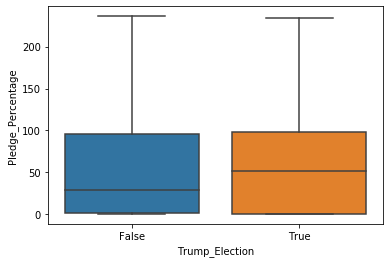

In [72]:
sns.boxplot(x='Trump_Election', y='Pledge_Percentage', data=kickstarter_ca, showfliers=False)

In [ ]:
#Take blue state, for example, are the sample means the same?

In [92]:
Blue_Before_Trump=kickstarter_us[(kickstarter_us['Ideology_Bin']=="Bluer") & (kickstarter_us['Trump_Election']==0)]
Blue_After_Trump=kickstarter_us[(kickstarter_us['Ideology_Bin']=="Bluer") & (kickstarter_us['Trump_Election']==1)]

In [101]:
Blue_Before_Trump_Means=create_sample_dists(Blue_Before_Trump, 'Pledge_Percentage', 10000, 1000)
Blue_After_Trump_Means=create_sample_dists(Blue_After_Trump, 'Pledge_Percentage', 10000, 1000)

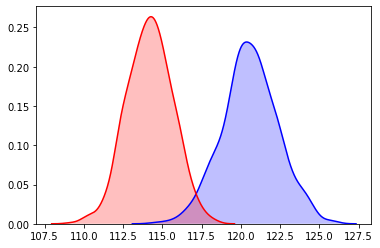

In [102]:
sns.kdeplot(data=Blue_Before_Trump_Means, shade=True, color="blue",gridsize=1000)
sns.kdeplot(data=Blue_After_Trump_Means, shade=True, color="red",gridsize=1000)

In [ ]:
#Us Vs Canada:

In [113]:
US_Before_Trump_Means=create_sample_dists(kickstarter_us[(kickstarter_us['Trump_Election']==0)], 'Pledge_Percentage', 10000, 100)
US_After_Trump_Means=create_sample_dists(kickstarter_us[(kickstarter_us['Trump_Election']==1)], 'Pledge_Percentage', 10000, 100)
CA_Before_Trump_Means=create_sample_dists(kickstarter_ca[(kickstarter_ca['Trump_Election']==0)], 'Pledge_Percentage', 3000, 100)
CA_After_Trump_Means=create_sample_dists(kickstarter_ca[(kickstarter_ca['Trump_Election']==1)], 'Pledge_Percentage', 2200, 100)

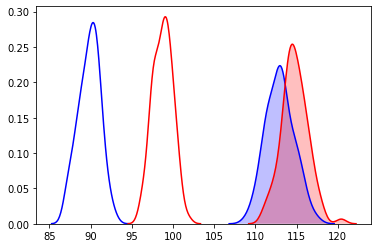

In [117]:
sns.kdeplot(data=US_Before_Trump_Means, shade=True, color="blue",gridsize=100)
sns.kdeplot(data=US_After_Trump_Means, shade=True, color="red",gridsize=100)
sns.kdeplot(data=CA_Before_Trump_Means, shade=False, color="blue",gridsize=100)
sns.kdeplot(data=CA_After_Trump_Means, shade=False, color="red",gridsize=100)

In [118]:
stats.ttest_ind(Blue_Before_Trump['Pledge_Percentage'],Blue_After_Trump['Pledge_Percentage'],equal_var=False)

Ttest_indResult(statistic=3.6599928113538063, pvalue=0.00025252250517091186)

In [128]:
#f-test: does Trump's election affect all category the same
reg = smf.ols(formula='Pledge_Percentage ~ C(Sup_Category, Treatment(reference="Technology")) * C(Trump_Election, Treatment(reference=0))', data=kickstarter_us).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:      Pledge_Percentage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     312.5
Date:                Fri, 23 Aug 2019   Prob (F-statistic):               0.00
Time:                        02:06:47   Log-Likelihood:            -5.5297e+05
No. Observations:               83080   AIC:                         1.106e+06
Df Residuals:                   83054   BIC:                         1.106e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

#### Findings & Application

#### Limitations

#### Next Steps